<a href="https://colab.research.google.com/github/devjaime/data_science_escalab/blob/main/Copia_de_2021_11_30_Clase_07_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajando con texto

- Python es reconocido por ser un lenguaje que permite fácilmente manipular datos de texto (*strings*)
- Muchas de las manipulaciones texto se hacen simples con los métodos que trae el lenguaje para manejar datos
- Para selección y manipulación de patrones complejos, puede ser necesarias las *expresiones regulares*
- `pandas`se suma a la mezcla, permitiendo ejecutar métodos de texto y expresiones regulares a arreglos enteros de datos, a la vez que maneja los problemas de datos perdidos

## Repaso métodos de string útiles (Python)

Para separar un string según un caracter y obtener una lista

In [ ]:
my_str = 'hola,   como,le   ,    va, adios  '
my_str.split(',')

['hola', '   como', 'le   ', '    va', ' adios  ']

Usualmente, se utiliza en complemento con `strip`

In [ ]:
texto = "        mi texto está aquí.         "
print(texto)
print(texto.strip())

        mi texto está aquí.         
mi texto está aquí.


In [ ]:
parts=[]
for t in my_str.split(','):
  parts.append(t.strip())
print(parts)

In [ ]:
parts = [t.strip() for t in my_str.split(',')]
print(parts)

['hola', 'como', 'le', 'va', 'adios']


Luego, pueden juntarse con otro caracter entremedio

In [ ]:
my_str = '-'.join(parts)
my_str

'hola-como-le-va-adios'

Verificar si una cadena es parte de otra (`substring`)

In [ ]:
'como-le-v' in my_str

True

Obtener el índice de la primera ocurrencia

In [ ]:
my_str.index('-')

4

In [ ]:
# my_str.index('k') # ups!

El método `find` es más simple que `index` (ya que solo entrega 1 o -1 dependiendo si encuentra el substring) y cumple con la misma función del operador `in` pero...

https://stackoverflow.com/a/18437853/1510734

**Conclusión:** ocupar operador `in` en vez de `find`

Para determinar la cantidad de veces que una cadena se encuentra dentro de otra

In [ ]:
my_str.count('-')

4

Y para reemplazar, incluso con un string vacío!!

In [ ]:
my_str.replace('-', ',')

'hola,como,le,va,adios'

In [ ]:
my_str.replace('-', '')

'holacomolevaadios'

In [ ]:
my_str2 = 'hola,                     como,le   ,    va, adios  '
while "  " in my_str2:
  my_str2 = my_str2.replace('  ', ' ')

print(my_str2)

hola, como,le , va, adios 


## Expresiones regulares

- Las *expresiones regulares* proveen una forma flexible para buscar patrones en un texto.
- Una expresión, normalmente llamada *regex*, es una cadena especial conformada una serie de patrones.
- Python contiene el módulo `re` para simplificarnos el trabajo con expresiones regulares.

- Las funciones del módulo `re` se pueden agrupar en 3 categorías:
  - Coincidencia de patrones
  - Sustituciones
  - Divisiones
- Por supuesto se relacionan entre si: Un *regex* describe un patrón utilizado para encontrar texto, que luego puede ser usado de muchas formas.
- Por ejemplo, si quisiéramos dividir texto por los caracteres "blancos" (espacios, tabs y saltos de líneas). La expresión regular que indica uno o más caracteres blancos es `\s+`
- https://regex101.com/ Excelente sitio para trabajar, debuggear y entender *regex*

In [ ]:
import re

In [ ]:
texto = "foo    bar\t baz  \n bye  \n\thello  "
print(texto)

foo    bar	 baz  
 bye  
	hello  


In [ ]:
re.split('\s+', texto)

['foo', 'bar', 'baz', 'bye', 'hello', '']

In [ ]:
# qué paso con el último elemento?
# hint: 2 opciones: strip o hacer un list comprehension con su len() y sacar con un if al final
re.split('\s+', texto)

- Al llamar a esta función, la expresión regular `\s+` primero es *compilada*, y luego la expresión compilada se pasa a la función `split`
- Si se necesita usar una expresión regular en varias llamadas a funciones o es una *regex* más compleja, lo mejor es compilarla manualmente.

In [ ]:
[t for t in re.split('\s+', texto) if len(t)!=0]

['foo', 'bar', 'baz', 'bye', 'hello']

In [ ]:
# https://docs.python.org/3.1/library/re.html#regular-expression-objects
re_sp = re.compile('\s+')
re_sp

re.compile(r'\s+', re.UNICODE)

In [ ]:
re_sp.split(texto)

['foo', 'bar', 'baz', 'bye', 'hello', '']

- Si en cambio, quisiéramos obtener una lista de todos los patrones que coinciden con nuestra `regex`, podemos usar el método `findall`

In [ ]:
re_sp.findall(texto)

['    ', '\t ', '  \n ', '  \n\t', '  ']

In [ ]:
re_sp.sub('_', texto) # substitute == replace

'foo_bar_baz_bye_hello_'

**Conclusión:** Si es una *regex* compleja o se va a utilizar más de una vez, primero compilarla y luego llamar a los métodos *split*, *sub*, *findall*, etc

Ahora, un ejemplo de regex más interesante que identifica direcciones de e-mails
- https://stackoverflow.com/a/201378/1510734

In [ ]:
texto = """
Juan le envió un correo a Benito benito@google.com
luego a Esteban esteban@gmail.com
Pero  a Roberto rob@gmail.com
javier javi@yahoo.cl
El argentino jorge@yahoo.com.ar
"""
print(texto)


Juan le envió un correo a Benito benito@google.com
luego a Esteban esteban@gmail.com
Pero  a Roberto rob@gmail.com
javier javi@yahoo.cl
El argentino jorge@yahoo.com.ar



In [ ]:
patron_ds = r'[\w\.]+@[\w]+\.[a-z]{2,4}' # patrón dominio simple
print(patron_ds)

[\w\.]+@[\w]+\.[a-z]{2,4}


- El signo `\w` indica cualquier caracter alfanumérico, más el guión bajo
- El signo `\.` indica un punto literal, y se usa con un backslash `\` porque el punto `.` significa *cualquier caracter* en expresiones regulares
- Lo que está entre corchetes indica que un caracter puede calzar con cualquiera de los patrones definidos dentro
- El signo `+` fuera de los paréntesis indica que debe haber al menos un caracter que cumpla esas reglas en el patrón
- El conjunto `[a-z]` indica que puede ser cualquiera de los caracteres en minúscula
- El elemento que sigue, en las llaves `{2,4}`, es un contador de ocurrencias similar a `+`, pero acá nos indica que debe haber al menos 2 ocurrencias y máximo 4.
- El resto de caracteres son tratados de forma literal. Por ejemplo, el `@` indica que para que el patrón se cumpla debe tener un caracter `@`

In [ ]:
re_ds = re.compile(patron_ds, flags=re.IGNORECASE)

- Al crear nuestra expresión regular compilada, le indicamos con el flag `IGNORECASE` que no verifique la coincidencia de mayúsculas y minúsculas
- Ahora, si buscamos todas las ocurrencias:

In [ ]:
re_ds.findall(texto)

['benito@google.com',
 'esteban@gmail.com',
 'rob@gmail.com',
 'javi@yahoo.cl',
 'jorge@yahoo.com']

No identicó el `com.ar`, modifiquemos el patrón

In [ ]:
#  r'[\w\.]+@[\w]+\.[a-z]{2,4}'
patron_dd = r'[\w\.]+@[\w]+\.[a-z]{2,4}\.?[a-z]{0,4}' # patrón dominio doble
print(patron_dd)

[\w\.]+@[\w]+\.[a-z]{2,4}\.?[a-z]{0,4}


In [ ]:
re_dd = re.compile(patron_dd, flags=re.IGNORECASE)
re_dd.findall(texto)

['benito@google.com',
 'esteban@gmail.com',
 'rob@gmail.com',
 'javi@yahoo.cl',
 'jorge@yahoo.com.ar']

### Grupos dentro de una expresión regular
<br/>
(Pueden ser muy útiles, por ejemplo en el caso del e-mail!)

In [ ]:
patron_gr = r'([\w\.%+-]+)@([\w]+)\.([a-z]{2,4})' ###### notar los paréntesis
re_gr = re.compile(patron_gr, flags=re.IGNORECASE)
re_gr

re.compile(r'([\w\.%+-]+)@([\w]+)\.([a-z]{2,4})', re.IGNORECASE|re.UNICODE)

In [ ]:
re_gr.match("juanito@microsoft.tk").groups()

('juanito', 'microsoft', 'tk')

In [ ]:
re_gr.findall(texto)

[('benito', 'google', 'com'),
 ('esteban', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('javi', 'yahoo', 'cl'),
 ('jorge', 'yahoo', 'com')]

# Visualización de Datos

- Crear visualizaciones informativas de datos (gráficos) es parte importante del análisis de datos o en la comunicación de hallazgos.
- Puede ser parte del proceso exploratorio del analista, por ejemplo
    - Identificar valores atípicos
    - Observar distribución de los datos
    - Observar correlaciones o tendencias
- Utilizando Python, se pueden crear gráficos estáticos (jpg, png, svg, pdf, etc), así como también gráficos interactivos en la web (basados en html+javascript).
- Python tiene diversas bibliotecas para crear visualizaciones estáticas o dinámicas:
    - `matplotlib`
    - `seaborn`
    - `plotly`
    - `ggplot`
    - `bokeh`
    - `panel`
    - `dash`
    - y muchas más...
- Nos centraremos en los 3 primeros.

- `matplotlib` es una de las bibliotecas más antiguas para la visualización de datos,y probablemente la más usada.
- Es muy versátil para crear una gran cantidad de gráficos.
- Las comunidades de `matplotlib` y `IPython` han colaborado para simplificar la creación de gráficos interactivos
- `matplotlib` puede ejecutarse en la mayoría de los sistemas operativos, y permite exportar las imágenes a la mayoría de los formatos comunes.
- Tiene una gran falencia; no es muy buena con gráficos interactivos.

> *Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.*

- Documentación en https://matplotlib.org/

- Con el tiempo, se han creado varios *wrappers* de visualización de datos que *por debajo* utilizan `matplotlib`.
- De esta forma, facilitan la creación de gráficos pero ocupan el mismo *motor* (`matplotlib`). Uno de los más populares es `seaborn`.


In [ ]:
pip install plotly

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Introducción a la API de matplotlib

- Para la mayoría de las acciones con gráficos, hay dos formas principales de hacer las cosas:
  - Utilizando la interfaz de procedimientos `pyplot` (o `plt`)
  - Utilizando los objetos (como *figuras* y *subgráficos*)

[Concepto staful vs stateless](https://realpython.com/python-matplotlib-guide/#stateful-versus-stateless-approaches)

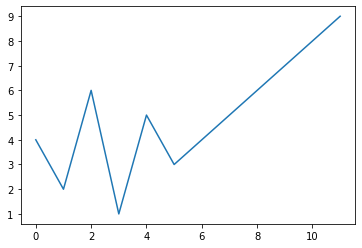

In [ ]:
# puedo graficar un lineplot tan simple como esto

data = [4,2,6,1,5]
plt.plot(data)

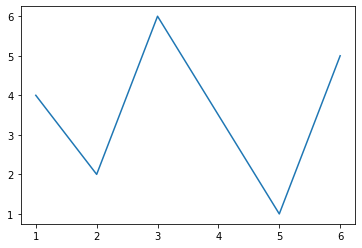

In [ ]:
data = [4,2,6,1,5]
x =    [1,2,3,5,6]
plt.plot(x,data)

### Figuras y subgráficos

- Los gráficos en `matplotlib` se almacenan en objetos de tipo figura (`Figure`)
- Se pueden crear nuevas figuras con la función `figure`

In [ ]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

- Esta función acepta varios parámetros opcionales
- Uno de uso común es `figsize`, que permite ajustar el tamaño y proporción del gráfico.

- No se puede crear un gráfico con una figura en blanco
- Entonces, se requiere crear uno o más *subgráficos* de la figura, con el método `add_subplot`

In [ ]:
ax = fig.add_subplot(1, 1, 1)

- Los primeros dos parámetros indican que la figura será de 1 x 1 (es decir, tendrá un subgráfico). El tercer parámetro indica que se selecciona el primero de los subgráficos.

- **Un detalle del uso de `matplotlib` con `jupyter notebooks`, es que los subgráficos (*pyplot/plt*) son reiniciados luego de que cada celda es evaluada.**
- Por lo tanto, para gráficos más elaborados, es necesario dejar toda las instrucciones en una misma celda.
- Demostración:

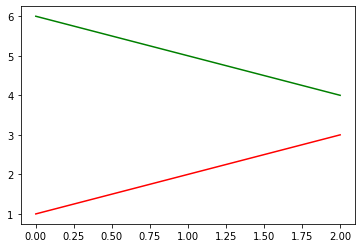

In [ ]:
plt.plot([1,2,3], 'r')
plt.plot([6,5,4], 'g')

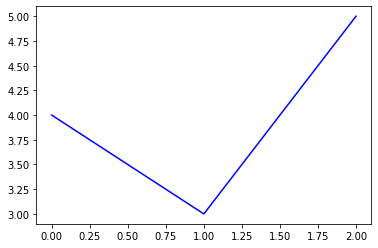

In [ ]:
plt.plot([4,3,5], 'b')

Creemos una figura con 2 axis

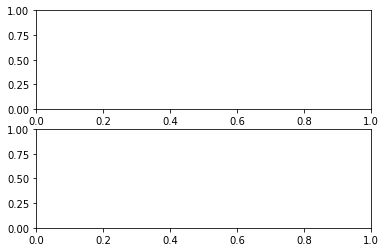

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)

ax2 = fig.add_subplot(2, 1, 2)


- Cuando usamos la función `plot`, `matplotlib` utiliza la última figura y subgráfico creado (o los crea si no existen)
- Por lo tanto, si volvemos a pasar la variable `data` como argumento, **sólo afectará al último subgráfico creado**

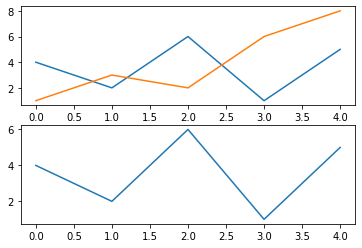

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
plt.plot([4,2,6,1,5])
plt.plot([1,3,2,6,8])
ax2 = fig.add_subplot(2, 1, 2)
plt.plot([4,2,6,1,5])


- Se puede graficar directamente desde el subgrafico (*ax1, ax2*)...

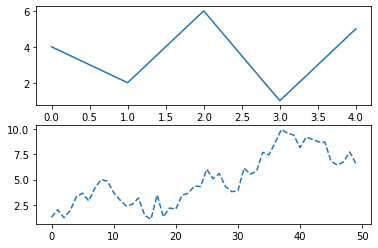

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot([4,2,6,1,5])

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(np.random.randn(50).cumsum(), '--')

- También se puede llamar a la función `plt.plot` varias veces para trabajar sobre **último subgráfico creado**.

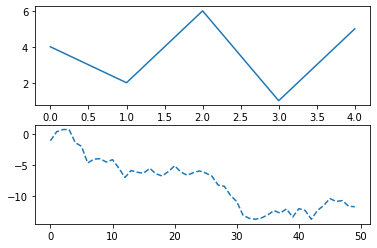

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
plt.plot([4,2,6,1,5]) # equivalente a ax1.plot(...) 

ax2 = fig.add_subplot(2, 1, 2)
plt.plot(np.random.randn(50).cumsum(), '--') # equivalente a ax2.plot(...)

- En el gráfico de la suma acumulada, vemos que pasamos un segundo parámetro a `plot`
- Este parámetro `--` es un estilo de línea, que le indica a `matplotlib` que debe dibujar una línea discontinua.
- También podemos agregar esta información en los objetos retornados por `add_subplot`
- Por ejemplo, es posible hacer esto:

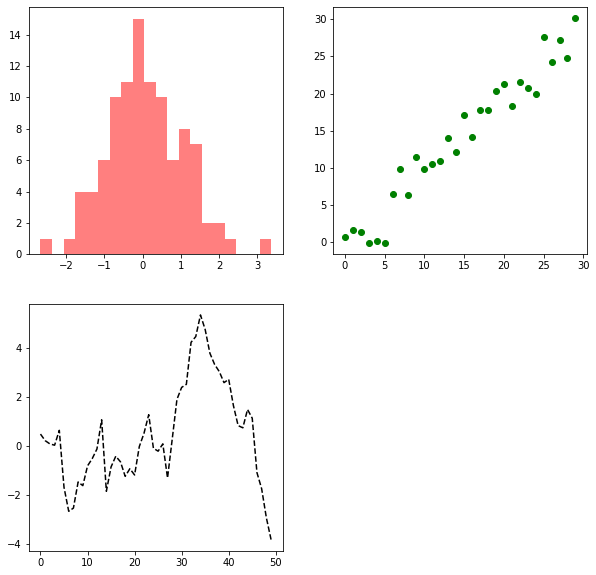

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

plt.plot(np.random.randn(50).cumsum(), 'k--') # actua sobre el último (ax3)
ax1.hist(np.random.randn(100), bins=20, color='r', alpha=0.5) # histograma
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30), c='g', marker='o') # scatter

Por defecto la figura es muy chica!<br/>
Esto se puede cambiar con el parámetro *figsize*

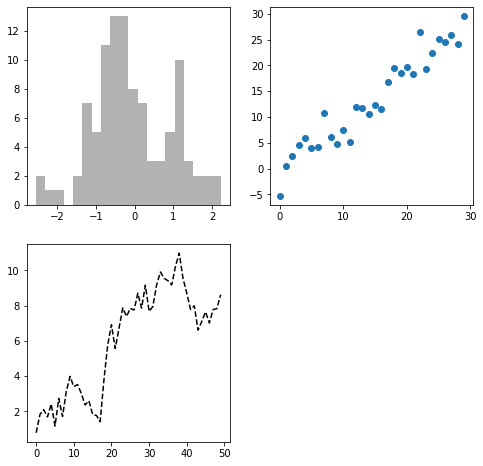

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

plt.plot(np.random.randn(50).cumsum(), 'k--') # actua sobre el último (ax3)
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

- De hecho, se puede cambiar el tamaño para todos los gráficos subsecuentes seteando un parámetro global de matplotlib

In [ ]:
plt.rcParams["figure.figsize"] = (5, 5)  # normalmente se pone al inicio del script

- Crear figuras con varios subgráficos es una tarea común.
- Por eso, `matplotlib` tiene habilitada una función que retorna una figura y un arreglo de `numpy` de subgráficos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf135a8c10>,
      dtype=object)

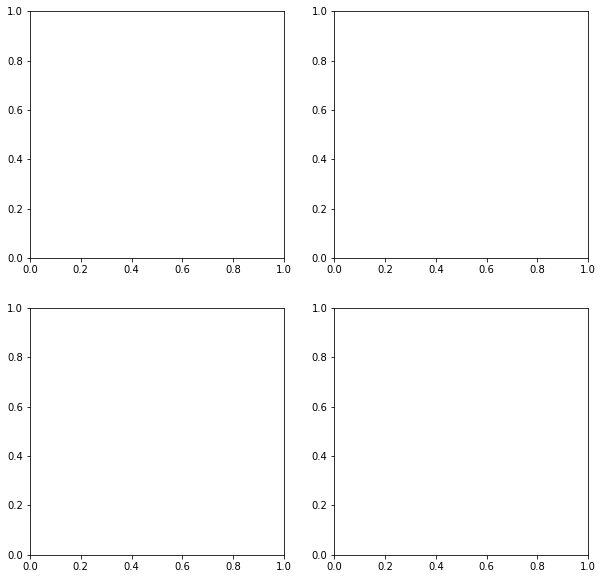

In [ ]:
fig, axes = plt.subplots(2, 2) # entrega la figura y todos los subgráficos, en este caso 4
# axes[0][0].plot([1,5,4,1,3])
axes

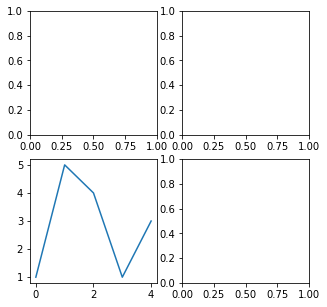

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2) # entrega la figura y todos los subgráficos, en este caso 4
ax3.plot([1,5,4,1,3])

- Esto es muy útil, ya que el arreglo de *axes* puede ser indexado como un arreglo de dos dimensiones cualquiera.

In [ ]:
axes.shape

(2, 2)

- Usando esta función, fácilmente se puede hacer todos los gráficos compartan los *ticks* de los ejes X e Y
- Para lograrlo, se utiliza los argumentos `sharex` y `sharey` respectivamente.

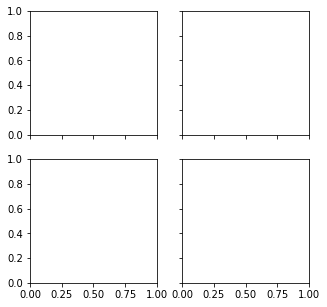

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

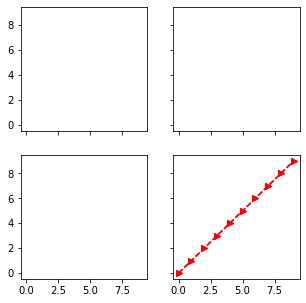

In [ ]:
axes[1,1].plot(range(10), c='r', marker='>', linestyle='--') # graficamos directamente en un subplot!
fig

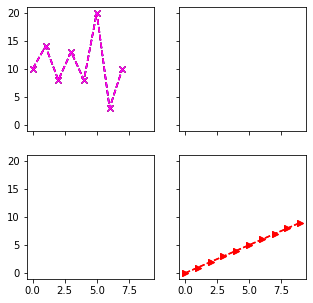

In [ ]:
#                                          rrggbb
axes[0,0].plot([10,14,8,13,8,20,3,10], c='#ff00ff', marker='x', linestyle='--') # graficamos directamente en un subplot!
fig

-  Las variables `fig` y `axes` mantuvieron su contenido entre distintas celdas (porque se utiliza el enfoque orientado a objetos).
- Además, se puede ajustar el espaciado que existe entre cada subgráfico.
- Para esto, se utiliza el método `subplots_adjust` de la figura.

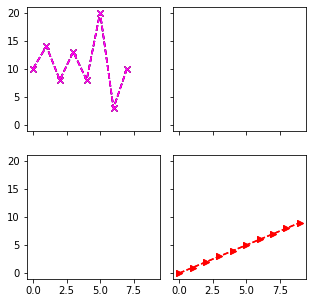

In [ ]:
fig.subplots_adjust(wspace=0.1, hspace=0.2)
fig

- Con la información vista hasta el  momento, se puede  dejar los gráficos pegados unos a otros, compartiendo *ticks* en cada eje

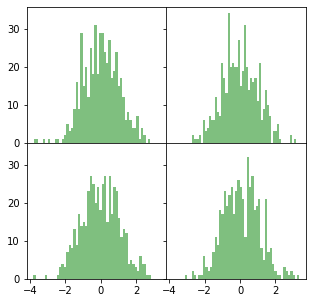

In [ ]:
filas = 2
columnas = 2
fig, axes = plt.subplots(filas, columnas, sharex=True, sharey=True)
fig.subplots_adjust(wspace=0, hspace=0)

for i in range(filas):
  for j in range(columnas):
    axes[i, j].hist(np.random.randn(500), bins=50, color='g', alpha=0.5)

### Títulos y nombres de ejes

Hay básicamente 2 formas:
- Utilizar *fig* y *axes*
- Utilizar *plt*

Text(0.5, 0, 'duración (s)')

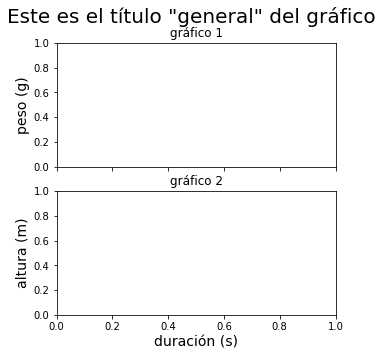

In [ ]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True) # 2 subgráficos en columna 
fig.suptitle('Este es el título "general" del gráfico', fontsize=20)
axes[0].set_title('gráfico 1')
axes[1].set_title('gráfico 2')

axes[0].set_ylabel('peso (g)', fontsize=14)
axes[1].set_ylabel('altura (m)', fontsize=14)

# axes[0].set_xlabel('duración (s)', fontsize=14) # no es necesario, ya que comparten eje
axes[1].set_xlabel('duración (s)', fontsize=14)

Text(0, 0.5, 'Altura (m)')

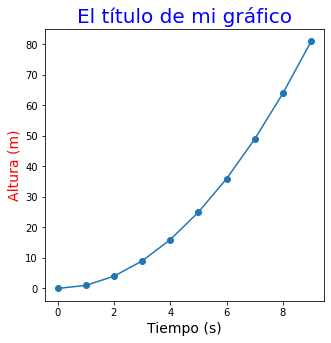

In [ ]:
plt.plot(range(10), np.arange(10)**2, 'o-')
plt.title('El título de mi gráfico', fontsize=20, color="b")
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Altura (m)', fontsize=14, color="r")

### Colores, marcadores y estilos

- La función `plot` puede aceptar simplemente una secuencia de números como único parámetro.
- Deja en el eje `y` cada uno de los valores
- Y deja en el eje `x` el índice de cada valor (0,1,2, ...)

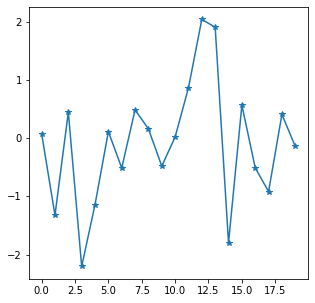

In [ ]:
plt.plot(np.random.randn(20), marker='*')

- También acepta dos arreglos, uno para cada eje `x` e `y`

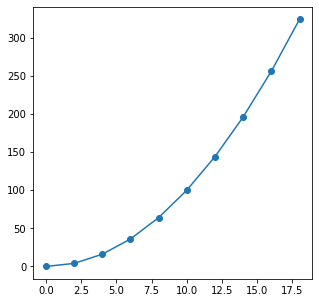

In [ ]:
x, y = np.arange(0, 20, 2), np.arange(0,20,2)**2
plt.plot(x, y, marker='o')

- Además de aceptar opcionalmente el color, estilo de *marker* y estilo de línea de forma separada, acepta una forma abreviada de todos ellos!

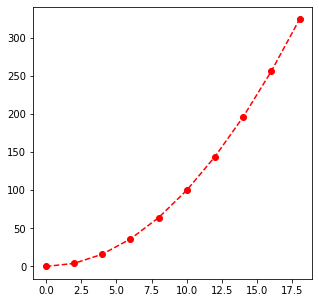

In [ ]:
plt.plot(x, y, color='r', marker='o', linestyle='--')

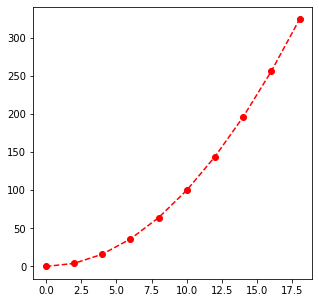

In [ ]:
plt.plot(x, y, 'ro--') # color, tipo marker, tipo línea

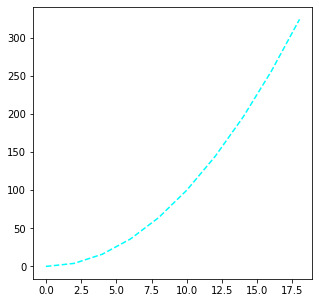

In [ ]:
plt.plot(x, y, linestyle='--', color='#00FFFF') # también puede ser un color en hexadecimal!

- Para los gráficos de líneas, se puede notar que los puntos subsecuentes tienen interpolaciones lineales por defecto.
- Se puede modificar este comportamiento con el parámetro `drawstyle`.

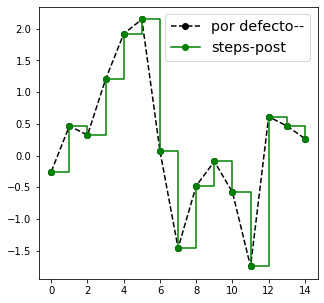

In [ ]:
cumsum = np.random.randn(15).cumsum()

plt.plot(cumsum, 'k--', label='por defecto--', marker='o')
plt.plot(cumsum, 'g-', label='steps-post', marker='o', drawstyle='steps-post')
plt.legend(loc='best', fontsize='x-large')

- Como se observa, en un mismo gráfico se puede graficar distintos datos, o los mismos de forma distinta.
- Ya que para cada gráfico se utiliza el argumento `label`, se crea una leyenda que permite identificar cada gráfico.

### Ticks, etiquetas y leyendas

- Para la mayoría de las decoraciones de gráficos, hay dos formas principales de hacer las cosas:
  - Utilizando la interfaz de procedimientos `pyplot` (o `plt`)
  - Utilizando los objetos (como *figuras* y *subgráficos*)

- La interfaz `pyplot` está diseñada para uso interactivo (como en los notebooks).
- Además, nos permite manejar el rango del gráfico y los ticks con las funciones `xlim` y `xticks` respectivamente
- Estas funciones se pueden usar de dos formas:
  - Sin parámetros, devuelven el valor actual
  - Con parámetros, establecen un nuevo valor

- Como ya vimos, estas funciones actúan sobre el último gráfico creado.
- Si tenemos el objeto del subgráfico, podemos llamar a los métodos del subgráfico específico con el mismo nombre, pero con la preposición `get_` para obtener el valor, y `set_` para establecer el valor
- Por ejemplo `ax.get_xlim` o `ax.set_xlim`

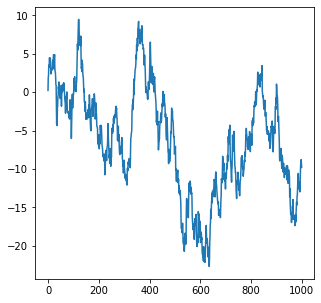

In [ ]:
cumsum = np.random.randn(1000).cumsum()
plt.plot(cumsum)

- Este es el gráfico de nuestra suma acumulada con los valores por defecto del gráfico.

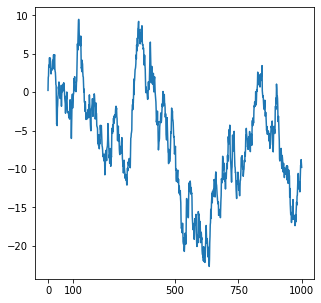

In [ ]:
plt.plot(cumsum)
ticks = [0, 100, 500, 750, 1000]
_ = plt.xticks(ticks) # asignamos a _ solo para que no lo entregue/retorne en el notebook

- Por defecto, las etiquetas son iguales a los ticks asignados, pero también podemos modificar esto:

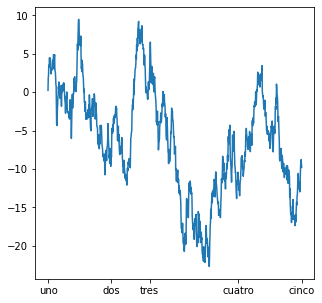

In [ ]:
plt.plot(cumsum)
ticks = [0, 250, 400, 750, 1000]
etiquetas = ['uno', 'dos', 'tres', 'cuatro', 'cinco']
_ = plt.xticks(ticks, labels=etiquetas)

- Complementando con anterior, podemos darle un nombre al eje `x` e `y`, además de un nombre al gráfico completo.

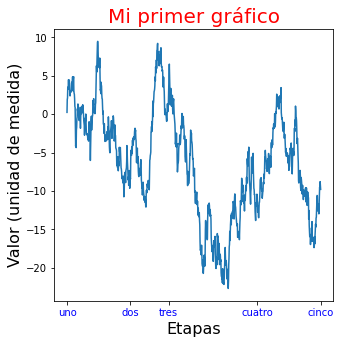

In [ ]:
plt.plot(cumsum)
plt.xticks(ticks, labels=etiquetas, color='b')
plt.xlabel('Etapas', fontsize=16)
plt.ylabel('Valor (unidad de medida)', fontsize=16)
_ = plt.title('Mi primer gráfico', fontsize=20, color='r')

- Las leyendas son otro elemento crítico de los gráficos.
- Hay varias formas de agregar leyendas.
- La forma más fácil es asignar una *label* al conjunto de punto como argumento a la función `plot`.
- Una vez hecho esto, llamamos a la función `legend`.

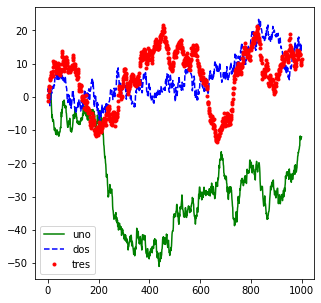

In [ ]:
plt.plot(np.random.randn(1000).cumsum(), 'g', label='uno')
plt.plot(np.random.randn(1000).cumsum(), 'b--', label='dos')
plt.plot(np.random.randn(1000).cumsum(), 'r.', label='tres')
plt.legend(title='',loc='best') # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

- El parámetro `loc` indica donde posicionar las leyendas
- El valor `best` deja la leyenda en la  mejor posición calculada por la biblioteca.
- Hay muchas otras opciones para el parámetro `loc`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

### Anotaciones y dibujos

- Además de los tipos de gráficos estándar, podemos agregar nuestras propias anotaciones a los gráficos, como texto o flechas.
- Podemos agregar estas personalizaciones con las funciones `text` y `annotate`.

- `text` agrega texto a una coordenada específica del gráfico, y opcionalmente podemos darle estilos.

Text(200, -5, 'Mi anotación en texto')

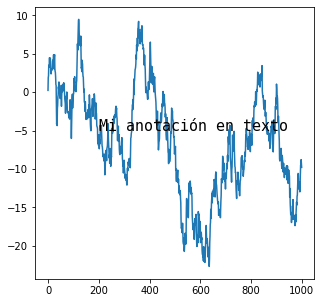

In [ ]:
#  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html
# x, y: float = The position to place the text. By default, this is in data coordinates.

plt.plot(cumsum)
plt.text(200, -5, 'Mi anotación en texto', family='monospace', fontsize=15)

- Las anotaciones permiten dibujar texto y flechas apropiadamente

Text(300, 1.1386599732163099, 'Observación importante')

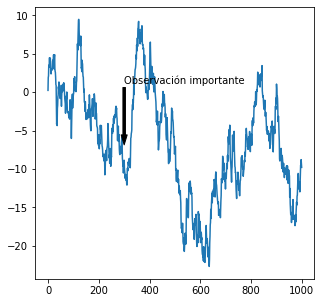

In [ ]:
plt.plot(cumsum)
x = 300
plt.annotate(
    'Observación importante',
    xy=(x, cumsum[x] + 2), # donde ubicar la punta de la flecha
    xytext=(x, cumsum[x] + 10), # donde ubicar el texto (cola de flecha)
    arrowprops={'facecolor': 'black', 'headwidth': 6, 'width': 2.5, 'headlength': 10}
)

### Exportando gráficos a archivos 

- Es posible guardar en archivos la figura actual con la función `savefig`, o el método `savefig` de una figura.
- Para cambiar el formato basta con cambiar la extensión del archivo.  Por ejemplo, si quisiéramos guardar la versión `SVG` de una figura, sólo necesitamos ejecutar:

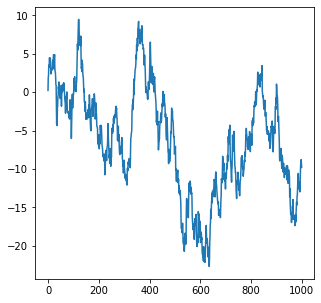

In [ ]:
plt.plot(cumsum)
plt.savefig('cumsum.png')

- El tipo de formato se infiere desde la extensión del archivo.
- Por lo tanto, si usamos la extensión `.pdf`, obtendremos un archivo *pdf* con la figura.

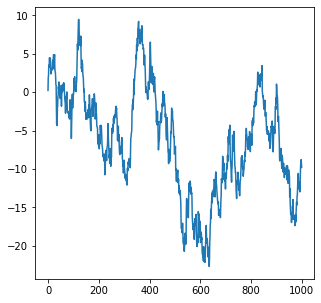

In [ ]:
plt.plot(cumsum)
plt.savefig('cumsum.pdf')

- Hay dos parámetros importantes que se suelen utilizar:
    - `dpi`, que controla la resolución de puntos por pulgada (*dots-per-inch* en inglés)
    - `bbox_inches`, que puede eliminar el espacio en blanco alrededor de la figura
- Por ejemplo, para guardar una imagen `PNG` de 400 *dpi* y un espacio mínimo alrededor de la figura:

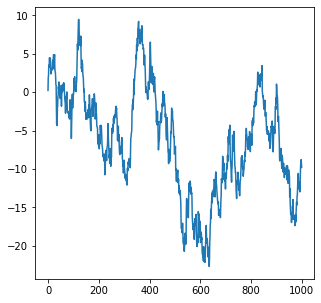

In [ ]:
# https://stackoverflow.com/a/47639545/1510734

plt.plot(cumsum)
plt.savefig('cumsum1.png', dpi=400, bbox_inches='tight')

### Resumen
> *Pyplot is the Matlab-like state-machine API, matplotlib.figure.Figure is part of the object-oriented API.*

[Referencia](https://stackoverflow.com/a/5450333/1510734)
<br/><br/>

> *So the main difference is rather at the user's side:*
- *Do you want to use the Matlab-like state machine approach, which may save some lines of code for simple plotting tasks? Then use pyplot.*
- *Do you want to have full control over the plotting using the more pythonic object oriented approach? Then use objects like axes explicitely.
You may want to read the matplotlib [usage guide](https://matplotlib.org/faq/usage_faq.html).*

[Referencia](https://stackoverflow.com/a/43483054/1510734)


## Graficar directamente desde Pandas

- `matplotlib` es una herramienta muy poderosa (para gráficos estáticos), pero puede ser una herramienta de muy bajo nivel (manejo muy al detalle, mucha configuración).
- Esto se observa, por ejemplo, en el hecho de que un gráfico se construye a partir de cada componente: los datos, las leyendas, el título, los *ticks*, etc.

- Es posible graficar directamente desde `pandas` utilizando como *backend* `matplotlib`. De esta forma, se aprovechan las columnas, filas y datos ya definidos dentro de la `Series` o `DataFrame`.
- `pandas` ya tiene incorporado varios métodos que simplifican la creación de distintos tipos de gráficos.

### Gráficos de línea (*lineplot*)

- `Series` y `DataFrames` tienen un método `plot` que nos permite crear gráficos básicos
- Por defecto, `plot` crea un gráfico de líneas

In [ ]:
s1 = pd.Series(
    np.random.randn(100).cumsum(),
    index=np.arange(0, 1000, 10)
)

s1

0      0.842493
10     0.451349
20     0.103309
30     1.948416
40     2.040042
         ...   
950    5.581587
960    5.789213
970    6.011454
980    5.779405
990    6.772729
Length: 100, dtype: float64

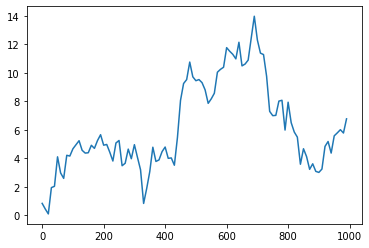

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html
# "Uses the backend specified by the option plotting.backend. By default, matplotlib is used."

s1.plot()

- Notar que el *index* es utilizado como eje `x`, aunque lo podemos deshabilitar con el parámetro `use_index`.
- El resto de opciones, como los *ticks* y etiquetas, pueden ser modificados con las funciones de `plt` que ya vimos antes, o con parámetros del método `plot`.
- La mayoría de los métodos de creación de gráficos de `pandas` aceptan el parámetro opcional `ax`, que es un subgráfico de `matplotlib` como los que ya hemos creado.

- En un `DataFrame`, el método `plot` crea una línea por cada columna de la tabla, y le deja automáticamente como leyenda el nombre de la columna.

In [ ]:
df = pd.DataFrame(
    np.random.randn(100, 4).cumsum(0),
    columns=['A', 'B', 'C', 'D'],
    index=np.arange(0, 10000, 100)
)

df

,A,B,C,D
0,0.452716,-0.747131,-0.513581,-0.710594
100,-0.665822,-2.317254,-0.520530,-0.635002
200,-1.545163,-3.286910,0.621364,-0.979508
300,-1.097062,-4.481813,1.316394,0.642218
400,1.279372,-3.186696,2.028171,-1.013748
...,...,...,...,...
9500,-6.791208,-8.916641,8.697715,21.702505
9600,-7.556270,-8.088405,8.580403,21.264370
9700,-6.838504,-9.722954,8.249564,21.965762
9800,-5.958842,-10.537109,9.293512,20.879665


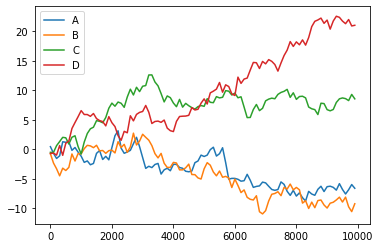

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

df.plot()

- El método `plot` contiene una *familia* de métodos para diferentes tipos de gráficos
- Es posible acceder a otros tipos de gráficos, utilizando `plot` como un atributo o indicando el parámetro *kind* en la función `plot`.


- Por defecto, `df.plot()` es equivalente a `df.plot.line()`

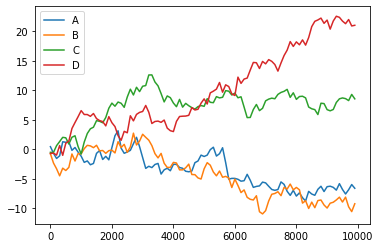

In [ ]:
df.plot(kind='line') # es equivalente a df.plot.line()

### Gráfico de barras (barplot)

- Los métodos `plot.bar()` y `plot.barh()` permiten crear gráficos de barras verticales y horizontales respectivamente.
- En este caso, cada índice es utilizado como nombre de cada barra.

A    0.571097
B    0.918072
C    0.879430
D    0.532564
E    0.349602
F    0.473119
G    0.038415
H    0.354828
I    0.884721
J    0.806647
K    0.775767
L    0.773913
M    0.478194
N    0.010129
O    0.463406
P    0.540693
dtype: float64


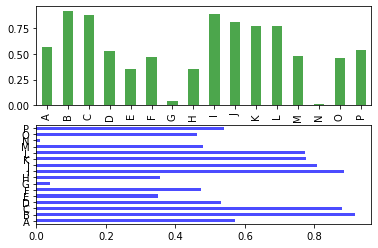

In [ ]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('ABCDEFGHIJKLMNOP'))
print(data)

data.plot.bar(ax=axes[0], color='g', alpha=0.7)
data.plot.barh(ax=axes[1], color='b', alpha=0.7)

- Si en cambio utilizamos un `DataFrame`, las barras serán agrupadas por fila lado a lado

In [ ]:
df2 = pd.DataFrame(
    np.random.rand(6, 4),
    index=['uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis'],
    columns=pd.Index(['A', 'B', 'C', 'D'], name='Letra')
)

df2

Letra,A,B,C,D
uno,0.969664,0.516751,0.179895,0.425448
dos,0.280449,0.682560,0.170486,0.943841
tres,0.828643,0.231111,0.554499,0.757346
cuatro,0.640958,0.669045,0.107662,0.238469
cinco,0.203376,0.419706,0.235735,0.962463
seis,0.792717,0.961288,0.739864,0.652134


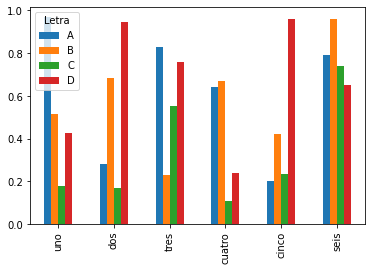

In [ ]:
df2.plot.bar()

- Notemos que el nombre del índice de columnas es utilizado como título de las leyendas.
- Además, podemos crear barras apiladas
- Para esto, pasamos el argumento `stacked=True`

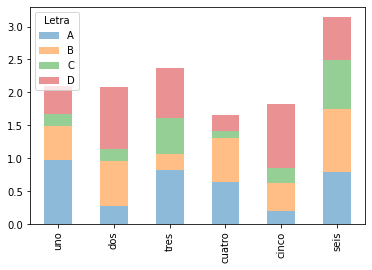

In [ ]:
df2.plot.bar(stacked=True, alpha=0.5)

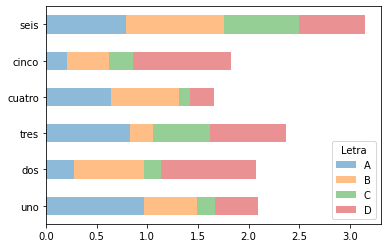

In [ ]:
df2.plot.barh(stacked=True, alpha=0.5) # ahora horizontal

- Ahora, probemos con un dataset

In [ ]:
propinas = pd.read_csv('https://raw.githubusercontent.com/pgalilea/datasets/main/csv/tips.csv')
print(propinas.time.unique())
propinas

['Dinner' 'Lunch']


,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


- En esta base de datos de salidas a comer, se incluyen datos de la cuenta total, la propina, si habían fumadores, el día de la semana, la hora, y la cantidad de participantes.
- Construyamos un **gráfico de barras apiladas**, que muestre el **porcentaje de salidas** por **cantidad de personas** en cada día de la semana

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
# Compute a simple cross tabulation of two (or more) factors

conteo = pd.crosstab(propinas['day'], propinas['size']) # en un eje todos los days y en el otro todos los size
conteo

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


- Como no hay muchos datos de fiestas de una o seis personas, nos deshacemos de esos datos

In [ ]:
conteo.drop(columns=[1,6], inplace=True)
conteo

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


- Ahora normalizamos los datos, para que cada **fila** sume 1 (es decir, 100%). Esto nos permite comparar porcentualmente todos los días.

In [ ]:
porcentaje = conteo.div(conteo.sum(axis=1), axis=0) # sumamos cada fila y luego dividimos cada elemento por la sumatoria
porcentaje

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


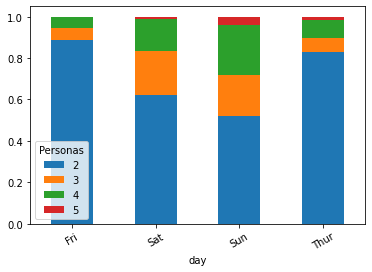

In [ ]:
porcentaje.plot.bar(stacked=True)

# plt.yticks(np.arange(0,1.2, 0.2))
plt.xticks(rotation=30, horizontalalignment="center")
plt.legend(title='Personas')

- Podemos ver que la cantidad de asistentes tiene a aumentar en los fines de semana (Sábado y Domingo hay mayor cantidad de 3 y 4 participantes, y bajan las asistencias con 2 participantes).

- Cuando los datos requieren agregaciones o resúmenes antes de crear los gráficos, es mucho más sencillo utilizar `seaborn`.

### Introducción a seaborn

> *Seaborn is a Python data visualization library **based on matplotlib**. It provides a high-level interface for drawing attractive and informative statistical graphics.*

In [ ]:
import seaborn as sns
sns.set() # establece el tema (por  defecto) de seaborn para futuros gráficos
# {darkgrid, whitegrid, dark, white, ticks}

- Notar que `seaborn` cambia automáticamente la estética de los gráficos. Modifica:
  - La paleta de colores
  - El fondo de los gráficos
  - Los colores de la cuadrícula

In [ ]:
propinas['tip_pct'] = (propinas['tip'] / propinas['total_bill'])*100. # porcentaje de propina respecto a la cuenta
propinas

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,5.944673
1,10.34,1.66,No,Sun,Dinner,3,16.054159
2,21.01,3.50,No,Sun,Dinner,3,16.658734
3,23.68,3.31,No,Sun,Dinner,2,13.978041
4,24.59,3.61,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,No,Sat,Dinner,2,9.820426


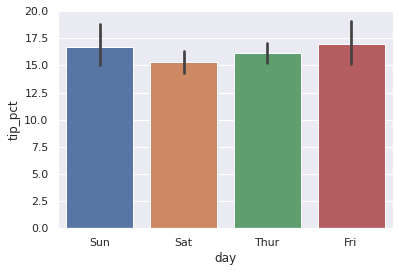

In [ ]:
sns.barplot(x='day', y='tip_pct', data=propinas, orient='v')

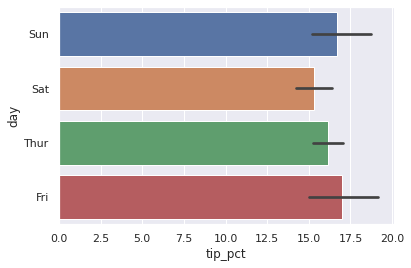

In [ ]:
sns.barplot(x='tip_pct', y='day', data=propinas, orient='h')

- Las funciones para graficar en `seaborn` utilizan el parámetro `data`, el cual puede ser un `DataFrame`.
- Como hay muchas observaciones por cada valor en el día, las barras indican el **porcentaje de propina promedio**.
- La línea negra dibujada indica el intervalo en el que se encuentra el 95% de las observaciones.
- Este último porcentaje puede ser modificado a través de parámetros.
<br><br>
- La función `barplot` tiene un parámetro opcional `hue`, el cual habilita la división de los datos según una columna de valores categóricos.

Text(0, 0.5, 'Porcentaje propina')

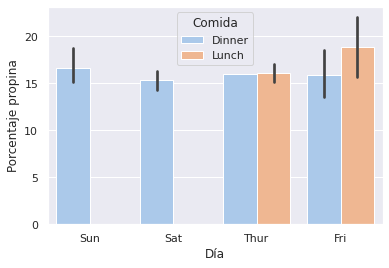

In [ ]:
sns.barplot(x='day', y='tip_pct', data=propinas, orient='v', hue='time', palette='pastel')

plt.legend(title='Comida')
plt.xlabel('Día')
plt.ylabel('Porcentaje propina')

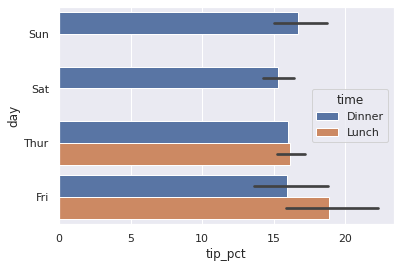

In [ ]:
sns.barplot(x='tip_pct', y='day', data=propinas, orient='h', hue='time')

In [ ]:
# {darkgrid, whitegrid, dark, white, ticks}
sns.set(style='darkgrid') # si no nos gustara el fondo azulado por defecto de seaborn

### Histogramas y gráficos de densidad

- Un histograma es una representación gráfica de una variable en forma de barras que presenta una visualización discreta de la frecuencia de los valores.
- Los elementos son divididos en grupos discretos de igual rango, y luego se grafica la cantidad de elementos por grupo.
- Usando los datos de propina vistos previamente, podemos crear un histograma de porcentaje de propina



> **Histograms plot binned quantitative data** while **bar charts plot categorical data**. Bars can be reordered in bar charts but not in histograms.

> Note that there are **no spaces between the bars of a histogram** since there are no gaps between the bins.
[...] On the other hand, **there are spaces between the variables of a bar chart**.

[Referencia](https://www.forbes.com/sites/naomirobbins/2012/01/04/a-histogram-is-not-a-bar-chart)



(0.0, 40.0)

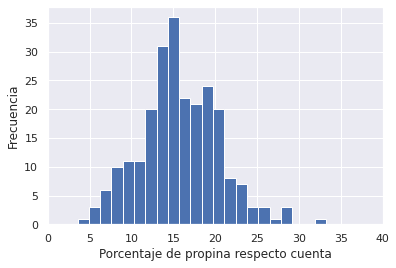

In [ ]:
propinas['tip_pct'].plot.hist(bins=50)

plt.ylabel('Frecuencia')
plt.xlabel('Porcentaje de propina respecto cuenta')
plt.xlim(0,40)

- Un gráfico relacionado es el gráfico de densidad.
- Los gráficos de densidad se forman calculando un **estimado** de la distribución de probabilidad continua que podría haber generado los datos observados.
- El procedimiento normal es aproximar esta distribución por una mezcla de *kernels* (esto es, distribuciones simples conocidas, como la distribución normal)
- Por ello, los gráficos de densidad también son conocidos como estimación de densidad con kernels (KDE, *kernel density estimate*)

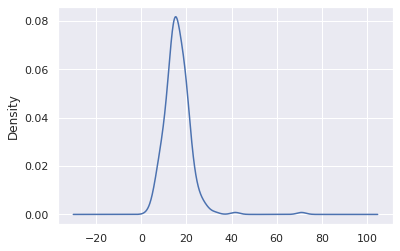

In [ ]:
propinas['tip_pct'].plot.density()

- `seaborn` permite crear histogramas y gráficos de densidad de forma aún más sencilla, con la función `histplot`.
- Esta función permite graficar un histograma y la densidad continua estimada de forma simultánea.
- Por ejemplo, consideremos una distribución bimodal, construída a partir de dos distribuciones normales diferentes.

In [ ]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

dist1 = np.random.normal(0, 1, size=200) # centrada en 0 con std de 1
dist2 = np.random.normal(10, 2, size=200) #  centrada en 10 con std de 2
valores = pd.Series(np.concatenate([dist1, dist2]))
valores

0      -0.795056
1       1.986814
2      -0.050830
3       0.904279
4      -1.355024
         ...    
395     8.441717
396     8.275179
397     9.083761
398     7.349875
399    11.197302
Length: 400, dtype: float64

Text(0.5, 0, 'ejex []')

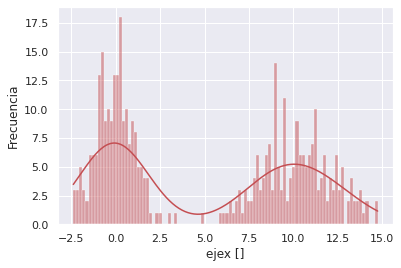

In [ ]:
sns.histplot(valores, kde=True, bins=100, color='r')

plt.ylabel('Frecuencia')
plt.xlabel('ejex []')

### Gráficos de dispersión o de puntos (*scatter*)

- Los gráficos de puntos, o de dispersión, pueden ser una forma útil de examinar las relaciones entre dos conjuntos de datos.
- Por ejemplo, cargaremos los datos desde un dataset de macroeconomía de US, seleccionaremos algunas variables, y luego calcularemos diferencias logarítmicas.

In [ ]:
# https://www.statsmodels.org/stable/datasets/generated/macrodata.html

macro = pd.read_csv('https://raw.githubusercontent.com/statsmodels/statsmodels/main/statsmodels/datasets/macrodata/macrodata.csv')
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


- Desde acá seleccionamos:
  - Índice de precios al consumidor (cpi)
  - M1 nominal de la bolsa de valores (m1)
  - Promedio trimestral de tesorería (tbilrate)
  - Porcentaje de desempleo (unemp)

In [ ]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


In [ ]:
# acotar todos los valores a [0,1], acelera los cálculos
data_trans = data.div(data.max(axis=0), axis=1) # parecido a lo que hicimos en conteo.div(conteo.sum(axis=1), axis=0)
print(data_trans)
# otro manejo de los datos que hace que se vean "más bonitos"
# data_trans = np.log(data).diff().dropna()
# print(data_trans)

          cpi        m1  tbilrate     unemp
0    0.132565  0.083458  0.183953  0.542056
1    0.133342  0.084653  0.200913  0.476636
2    0.134257  0.083936  0.249185  0.495327
3    0.134349  0.083637  0.282453  0.523364
4    0.135126  0.083398  0.228311  0.485981
..        ...       ...       ...       ...
198  0.992128  0.880996  0.076321  0.560748
199  0.970559  0.941813  0.007828  0.644860
200  0.972833  0.951550  0.014351  0.757009
201  0.981058  0.987873  0.011742  0.859813
202  0.989822  1.000000  0.007828  0.897196

[203 rows x 4 columns]


- Con la función `regplot` de `seaborn`, podemos crear un gráfico de distribución y ajustar una regresión lineal.

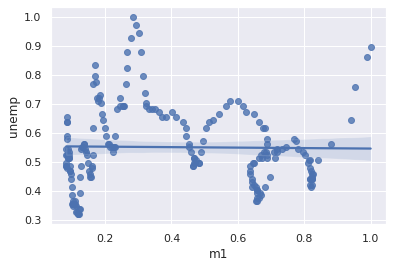

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# "Plot data and a linear regression model fit."

sns.regplot(x='m1', y='unemp', data=data_trans)

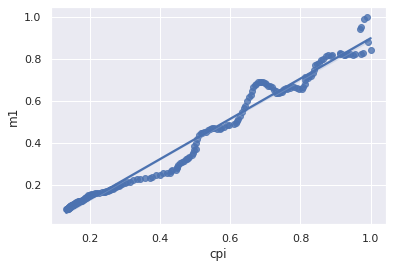

In [ ]:
sns.regplot(x='cpi', y='m1', data=data_trans)

- En análisis exploratorio de datos, es útil ver gráficos de dispersión entre distintos grupos de variables.
- Esto se conoce como *gráficos de pares*, o *matriz de gráficos de dispersión*.
- Crear estos gráficos a mano involucra un poco de trabajo.
- Por eso, `seaborn` tiene una función `pairplot` que hace el trabajo por nosotros.

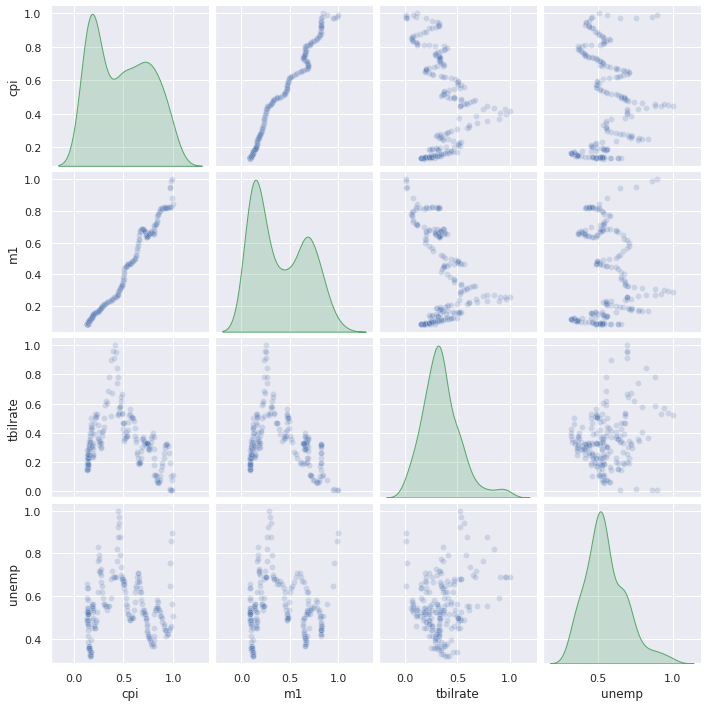

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

sns.pairplot(data_trans, diag_kind='kde', plot_kws={'alpha': 0.2, 'color':'b'}, diag_kws={'color':'g'})

- Podemos ver que la función crea gráficos de dispersión con todas las combinaciones posibles de columnas.
- El tipo de gráfico de la diagonal (donde se repite la misma variable en x e y) se selecciona con el parámetro `diag_kind`.
- Con el parámetro `plot_kws` podemos pasarle parámetros a cada gráfico, como el color o la transparencia.
- Podemos pasar parámetros también a la diagonal, con `diag_kws`.

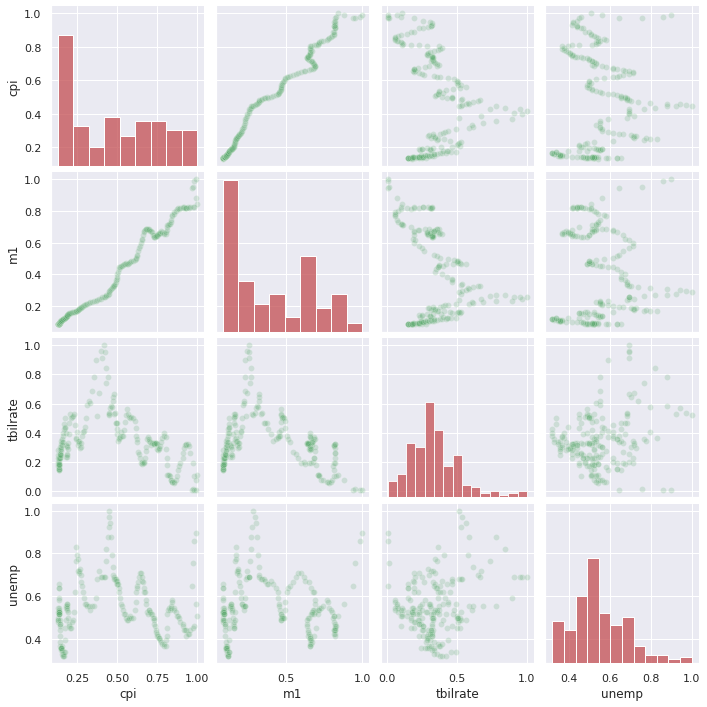

In [ ]:
sns.pairplot(data_trans, diag_kind='hist', plot_kws={'alpha': 0.2, 'color': 'g'}, diag_kws={'color': 'r'})

### Grillas de facetas y datos categóricos

- ¿Y qué pasa con los datasets que tienen agrupaciones dimensionales adicionales?
- Una forma de visualizar datos con muchas variables categóricas (que se utilizan para agrupar en más dimensiones), es una *grilla de facetas*
- `seaborn` tiene una función implementada que simplifica la creación de muchos tipos de gráficos de facetas
- Veamoslo con un ejemplo, utilizando datos de propinas

In [ ]:
propinas

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,5.944673
1,10.34,1.66,No,Sun,Dinner,3,16.054159
2,21.01,3.50,No,Sun,Dinner,3,16.658734
3,23.68,3.31,No,Sun,Dinner,2,13.978041
4,24.59,3.61,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,No,Sat,Dinner,2,9.820426


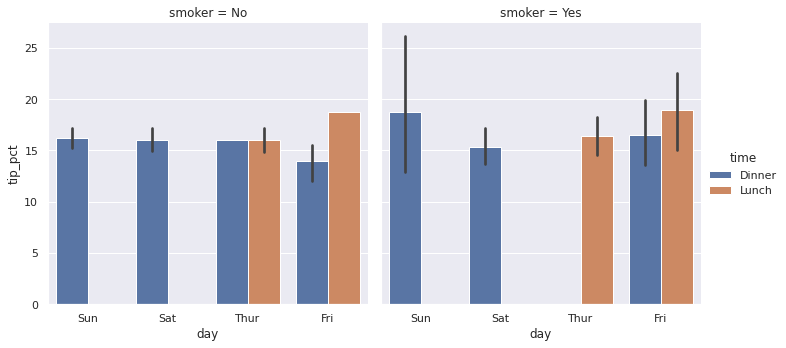

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.catplot.html

sns.catplot(
    x='day',
    y='tip_pct',
    hue='time', # col color
    col='smoker', # es categórica binaria
    kind='bar',
    data=propinas[propinas.tip_pct > 6]  # eliminamos valores atípicos: tips<6%
)

- En vez de agrupar por `time` en distintos gráficos de colores, podríamos expandir la grilla, para que tenga una fila por cada valor en `time`

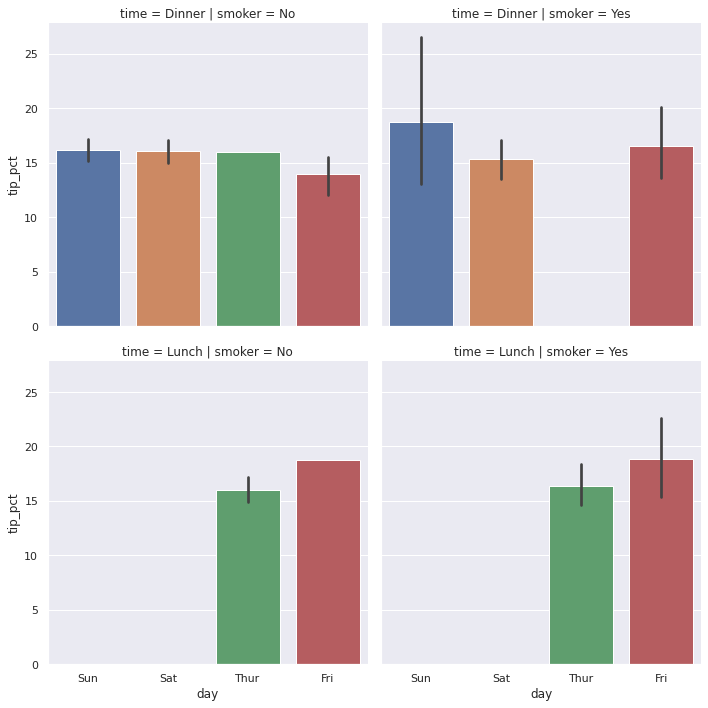

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.catplot.html

sns.catplot(
    x='day',
    y='tip_pct',
    row='time',
    col='smoker',
    kind='bar',
    data=propinas[propinas.tip_pct > 6] 
)

- `catplot` también soporta otros tipos de gráficos
- Dependiendo de lo que queremos obtener, nos podrían ser útiles gráficos de cajas o *box*
- Estos gráficos nos permiten ver medianas, cuartiles y valores atípicos 

In [ ]:
# https://en.wikipedia.org/wiki/Box_plot

sns.catplot(
    x='day',
    y='tip_pct',
    kind='box',
    data=propinas
)

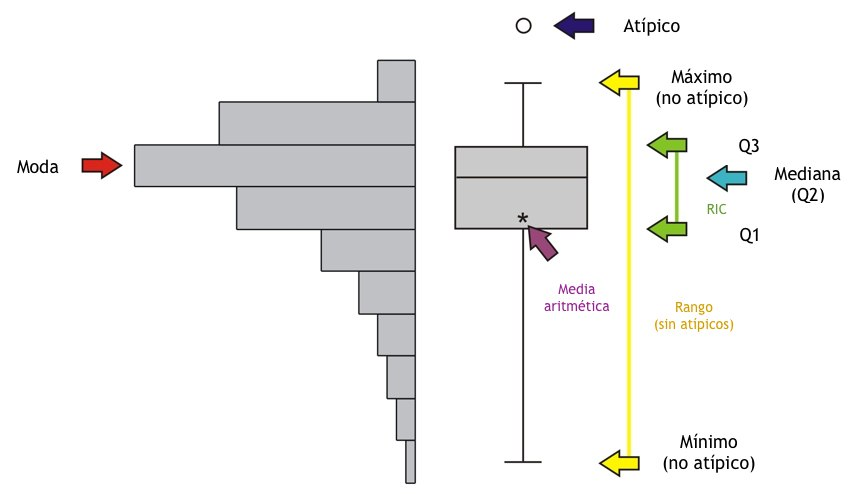

20


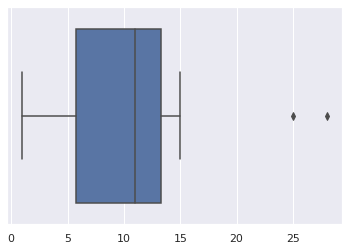

In [ ]:
my_vals = [1,2,3,4,5,6,7,28,9,10,11,11,12,12,13,13,14,14,15,25]
ax = sns.boxplot(x=my_vals)
print(len(my_vals))
ax

## Gráfico conjunto de dos variables (*jointplot*)

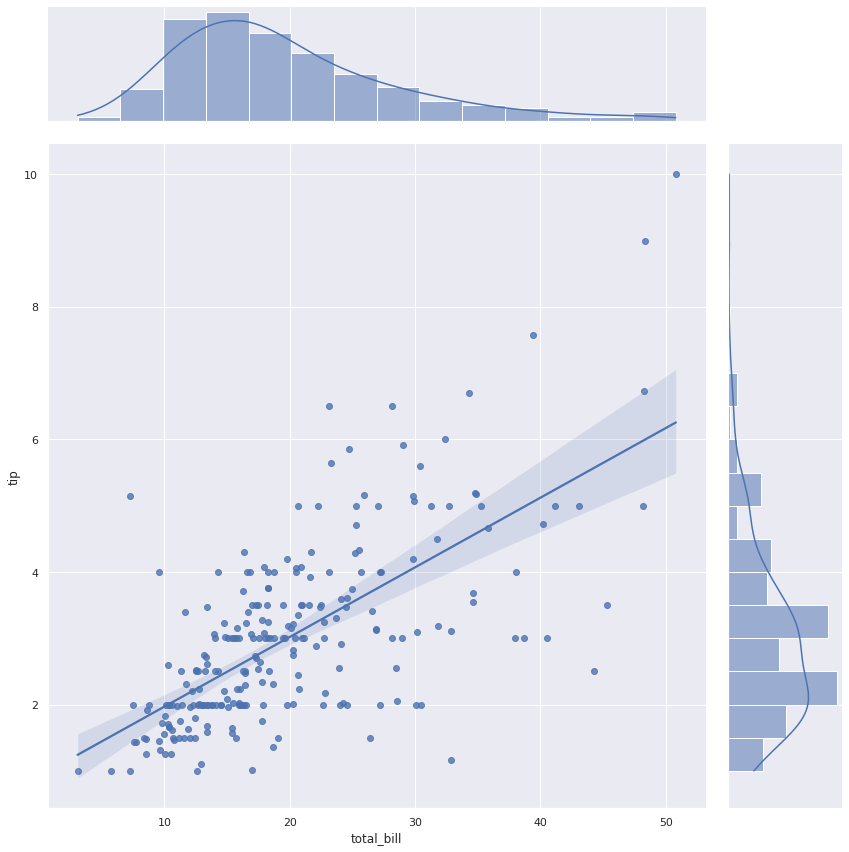

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.jointplot.html

sns.jointplot(x='total_bill', y='tip', data=propinas, kind="reg", height=12)

In [ ]:
propinas1 = propinas[propinas["tip_pct"] < 65]
propinas1
# sns.jointplot(x='total_bill', y='tip', data=propinas, kind="reg", height=12)

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,5.944673
1,10.34,1.66,No,Sun,Dinner,3,16.054159
2,21.01,3.50,No,Sun,Dinner,3,16.658734
3,23.68,3.31,No,Sun,Dinner,2,13.978041
4,24.59,3.61,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,No,Sat,Dinner,2,9.820426


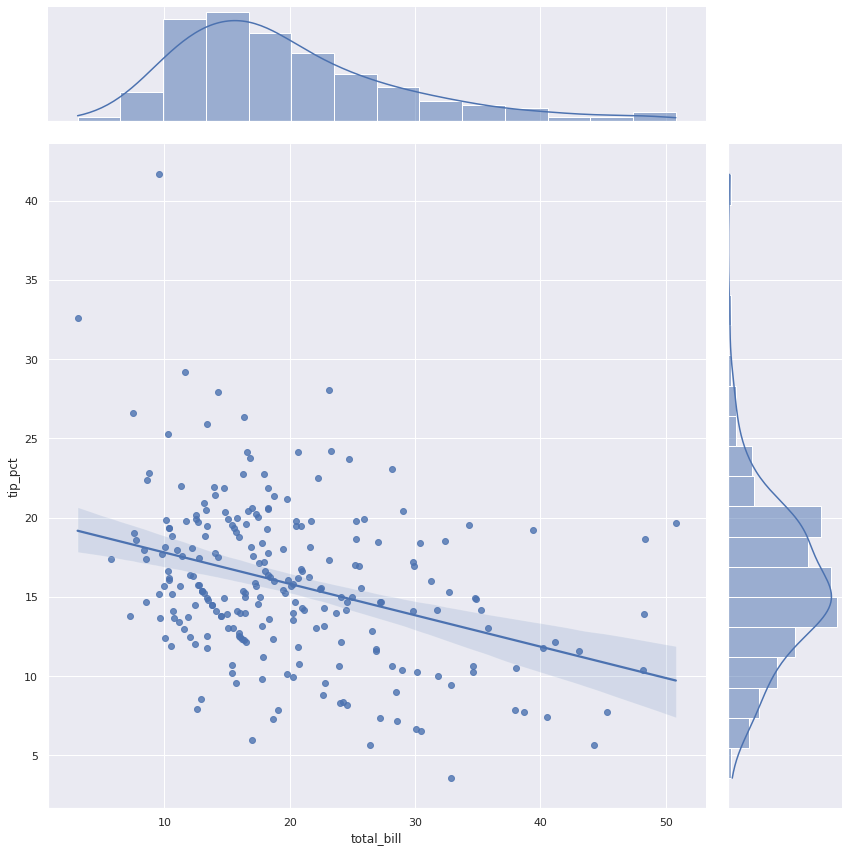

In [ ]:
sns.jointplot(x='total_bill', y='tip_pct', data=propinas1, kind="reg", height=12)

## Resumen
- `catplot` y `jointplot` muy prácticos y rápidos para visualizar relación entre variables.

## Introducción a plotly

> *The plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.*

> *Built on top of the Plotly JavaScript library (plotly.js), plotly enables Python users to create beautiful interactive web-based visualizations that can be displayed in Jupyter notebooks, saved to standalone HTML files, or served as part of pure Python-built web applications using Dash. The plotly Python library is sometimes referred to as "plotly.py" to differentiate it from the JavaScript library.*

[Referencia](https://plotly.com/python/getting-started/)

### plotly express

> *The plotly.express module (usually imported as px) contains functions that can create entire figures at once, and is referred to as Plotly Express or PX. Plotly Express is **a built-in part of the plotly library**, and **is the recommended starting point** for creating most common figures.*

> *The API for these functions was carefully designed to **be as consistent and easy to learn as possible**, making it easy to switch from a scatter plot to a bar chart to a histogram to a sunburst chart throughout a data exploration session.*

[Referencia](https://plotly.com/python/plotly-express/)

In [ ]:
import plotly.express as px

In [ ]:
tips = px.data.tips()

In [ ]:
gapminder = px.data.gapminder()
print(gapminder.isnull().any(axis=0)) # no tiene nulos!
gapminder

country      False
continent    False
year         False
lifeExp      False
pop          False
gdpPercap    False
iso_alpha    False
iso_num      False
dtype: bool


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [ ]:
gm_2007 = gapminder.query('year==2007')
gm_2007

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


#### Scatter

In [ ]:
px.scatter(gm_2007, x="gdpPercap", y="lifeExp")

In [ ]:
px.scatter(gm_2007, x="gdpPercap", y="lifeExp", color="continent", size="pop", size_max=60, hover_name="country")

In [ ]:
px.scatter(tips, x="total_bill", y="tip", color="smoker", trendline="ols", marginal_x="histogram", marginal_y="box")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
px.scatter(gapminder, x="gdpPercap", y="lifeExp", size="pop", size_max=60, color="continent", hover_name="country",
           animation_frame="year", animation_group="country", log_x=True, range_x=[100,100000], range_y=[25,90],
           labels=dict(pop="Population", gdpPercap="GDP per Capita", lifeExp="Life Expectancy"))

#### Histogram

In [ ]:
px.histogram(tips, x="total_bill", color="smoker") # conclusión: smoker or not tienen un comportamiento similar

#### Boxplot

In [ ]:
px.box(tips, x="day", y="total_bill", orientation="v", color="smoker",
       category_orders={"day": ["Thur", "Fri", "Sat", "Sun"]})

In [ ]:
px.box(tips, x="total_bill", y="day", orientation="h", color="smoker",
       category_orders={"day": ["Thur", "Fri", "Sat", "Sun"]})

#### Pie chart

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# https://plotly.com/python/pie-charts/

col = 'day' # size, sex, day, time
pdc = tips[col].value_counts().to_dict()
px.pie(names=list(pdc.keys()), values=list(pdc.values()), title='Título del gráfico')

#### scatter 3d

In [ ]:
px.scatter_3d(tips, x='total_bill', y='tip', z='size', color='sex')

## Ejercicios

### pandas + matplotlib

Los "k" países que más aportan inmigrantes en total (lineplot)

In [ ]:
df_chi = pd.read_excel('https://raw.githubusercontent.com/pgalilea/datasets/main/xlsx/MigrantesChile_(2005-2016).xlsx', sheet_name='Migrantes', skipfooter=3)
df_chi

,ID Continent,Continent,ID Country,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,142,Asia,308,Afghanistan,8,4,5,1,2,1,3,6,15,4,12,15
1,150,Europe,518,Albania,2,1,1,2,2,5,3,2,1,2,7,11
2,150,Europe,563,Germany,495,481,562,614,587,644,685,747,687,845,778,582
3,150,Europe,525,Andorra,2,1,1,1,0,0,2,0,1,2,2,1
4,2,Africa,140,Angola,1,2,4,3,2,4,6,8,1,1,13,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2,Africa,136,Uganda,0,0,0,0,0,0,1,0,1,0,1,0
170,19,America,223,Uruguay,1077,1099,1275,1271,1171,1190,1075,1186,956,957,1072,858
171,142,Asia,560,Uzbekistan,2,4,1,2,0,1,2,4,2,1,1,4
172,19,America,201,Venezuela,567,618,773,819,1013,1091,1453,1760,2015,3557,9730,26623


In [ ]:
df_chi.drop(['ID Continent','ID Country'], axis=1, inplace=True)
df_chi['Total'] = df_chi.sum(axis=1)
df_chi.set_index('Country', inplace=True)
df_chi.index.name = None
df_chi

,Continent,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Afghanistan,Asia,8,4,5,1,2,1,3,6,15,4,12,15,76
Albania,Europe,2,1,1,2,2,5,3,2,1,2,7,11,39
Germany,Europe,495,481,562,614,587,644,685,747,687,845,778,582,7707
Andorra,Europe,2,1,1,1,0,0,2,0,1,2,2,1,13
Angola,Africa,1,2,4,3,2,4,6,8,1,1,13,19,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uganda,Africa,0,0,0,0,0,0,1,0,1,0,1,0,3
Uruguay,America,1077,1099,1275,1271,1171,1190,1075,1186,956,957,1072,858,13187
Uzbekistan,Asia,2,4,1,2,0,1,2,4,2,1,1,4,24
Venezuela,America,567,618,773,819,1013,1091,1453,1760,2015,3557,9730,26623,50019


          Continent   2005   2006   2007  ...   2014   2015   2016   Total
Peru        America  25966  32746  63869  ...  49900  59767  53624  566630
Colombia    America   2179   3195   4834  ...  33939  44535  47352  223590
Bolivia     America   2420   2815   7448  ...  34978  39126  27852  192347
Argentina   America   6263   6114   5656  ...   8326   9605   8176   79747
Ecuador     America   2956   3135   4352  ...   5309   6374   7261   55227
Venezuela   America    567    618    773  ...   3557   9730  26623   50019
Haiti       America     12     55    119  ...   4407  10071  27395   49352

[7 rows x 14 columns]


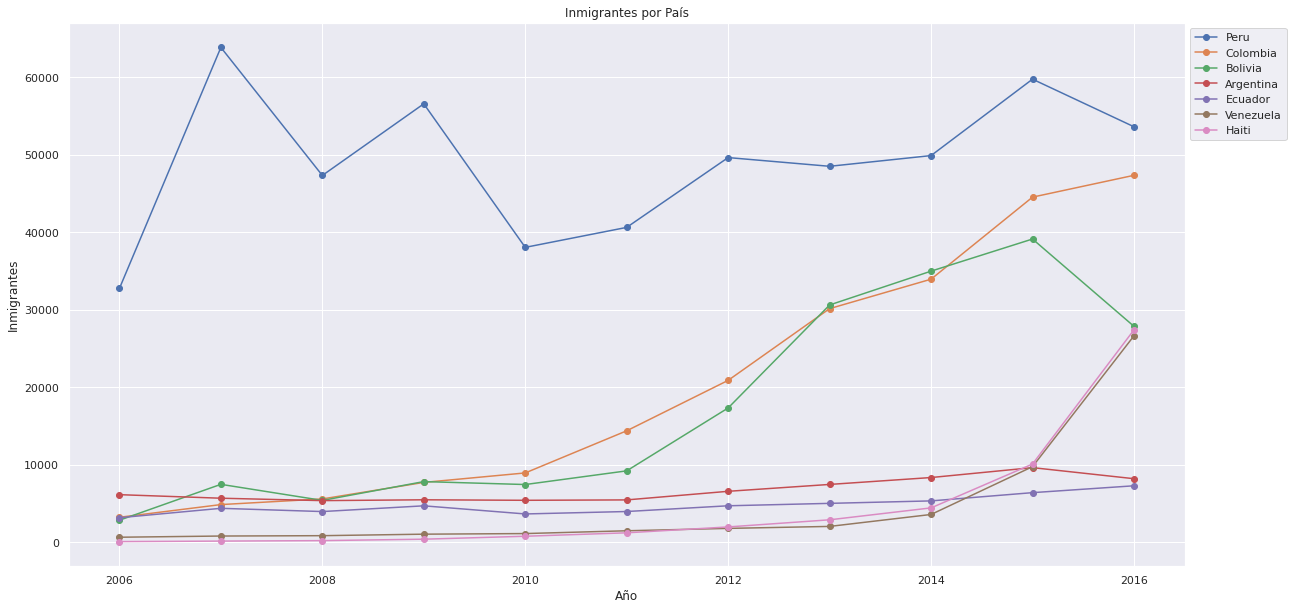

In [ ]:
k = 7 # elegir los k países que más inmigrantes aportan

print(df_chi.sort_values(by=['Total'], ascending=False)[:k])
df_chi.sort_values(by=['Total'], ascending=False)[:k].loc[:, range(2006, 2017)].T.plot.line(marker='o', figsize=(20,10), legend=True,
                                                            title='Inmigrantes por País', xlabel='Año', ylabel='Inmigrantes').legend(bbox_to_anchor=(1, 1))

### plotly express

Relación entre PIB per Cápita y Nacimientos por Mujer, en cada año (bubblechart animation)

In [ ]:
df_gm = pd.read_csv('https://raw.githubusercontent.com/pgalilea/datasets/main/csv/gapminder_data2.csv')
df_gm

,country,year,pop,continent,lifeExp,gdpPercap,bornPerwom
0,Afghanistan,1952,8425333.0,Asia,28801.00,779.445314,7.55
1,Afghanistan,1957,9240934.0,Asia,30332.00,820.853030,7.49
2,Afghanistan,1962,10267083.0,Asia,31997.00,853.100710,7.45
3,Afghanistan,1967,11537966.0,Asia,34.02,836.197138,7.45
4,Afghanistan,1972,13079460.0,Asia,36088.00,739.981106,7.45
...,...,...,...,...,...,...,...
1675,Zimbabwe,1987,9216418.0,Africa,62351.00,706.157306,5.78
1676,Zimbabwe,1992,10704340.0,Africa,60377.00,693.420786,4.84
1677,Zimbabwe,1997,11404948.0,Africa,46809.00,792.449960,4.24
1678,Zimbabwe,2002,11926563.0,Africa,39989.00,672.038623,4.00


In [ ]:
fig = px.scatter(df_gm, x='gdpPercap', y='bornPerwom', size='pop', color='continent', hover_name="country")


fig.update_layout(
    title={
        'text': "PIB vs Nacimientos por mujer",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis={'type':"log"}
)

fig

In [ ]:
fig = px.scatter(df_gm, x='gdpPercap', y='bornPerwom', size='pop', color='continent', hover_name="country",
                 log_x=True, range_x=[280, 60000], animation_frame='year', size_max=40, labels={"gdpPercap": "PIB", "bornPerwom": "Nacimientos por cada mujer"})

fig

## Conclusiones

- El objetivo de esta clase fue tener un primer acercamiento con las herramientas de visualización de datos disponibles en Python: `pandas`, `matplotlib`, `seaborn` y `plotly`.
- Es muy importante saber comunicar resultados de forma visual y clara, donde la audiencia no siempre son especialistas. 
- Cuando se presenta un gráfico **a terceros** es importante incluir un título, nombre de ejes (con sus unidades de medida si corresponde) y colores adecuados.

## Usted no lo haga!

          Continent   2005   2006   2007  ...   2014   2015   2016   Total
Peru        America  25966  32746  63869  ...  49900  59767  53624  566630
Colombia    America   2179   3195   4834  ...  33939  44535  47352  223590
Bolivia     America   2420   2815   7448  ...  34978  39126  27852  192347
Argentina   America   6263   6114   5656  ...   8326   9605   8176   79747
Ecuador     America   2956   3135   4352  ...   5309   6374   7261   55227
Venezuela   America    567    618    773  ...   3557   9730  26623   50019
Haiti       America     12     55    119  ...   4407  10071  27395   49352

[7 rows x 14 columns]


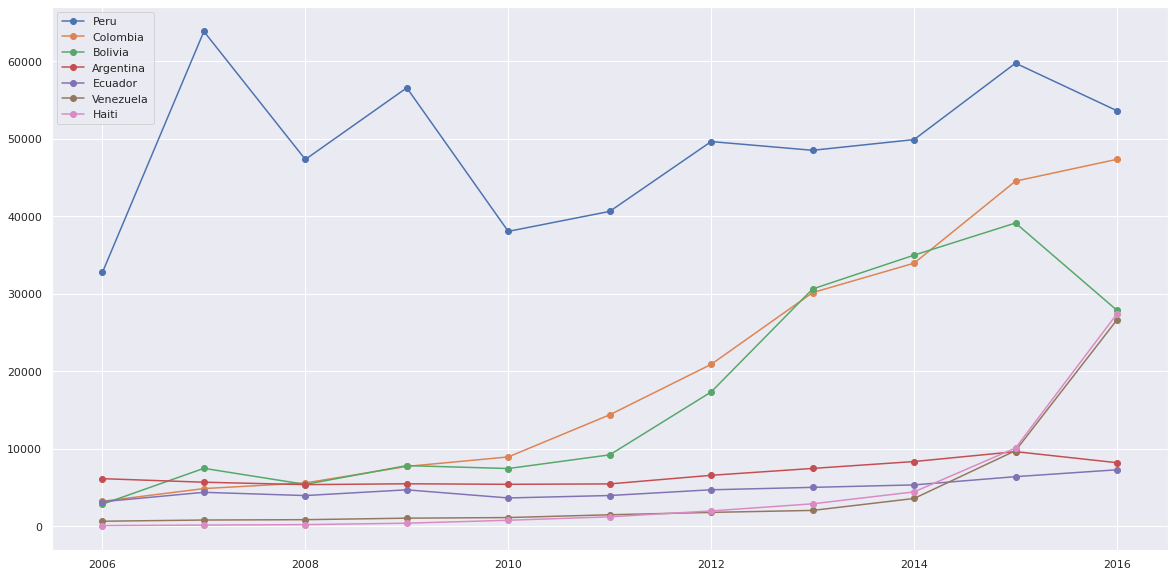

In [ ]:
k = 7 # elegir los k países que más inmigrantes aportan

print(df_chi.sort_values(by=['Total'], ascending=False)[:k])
df_chi.sort_values(by=['Total'], ascending=False)[:k].loc[:, range(2006, 2017)].T.plot.line(marker='o', figsize=(20,10))

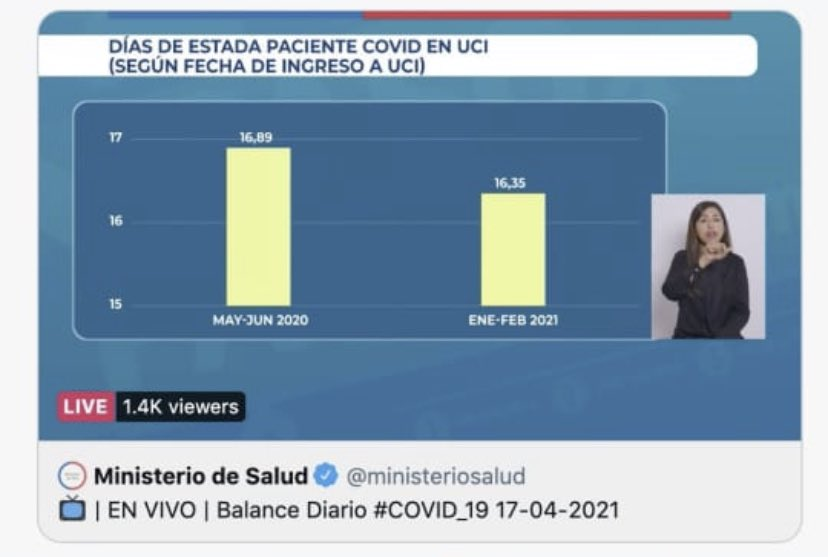

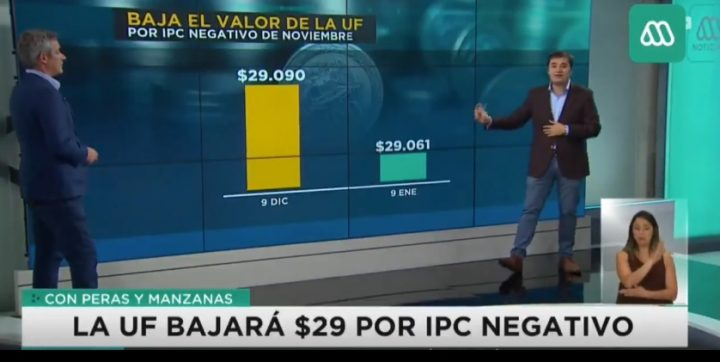

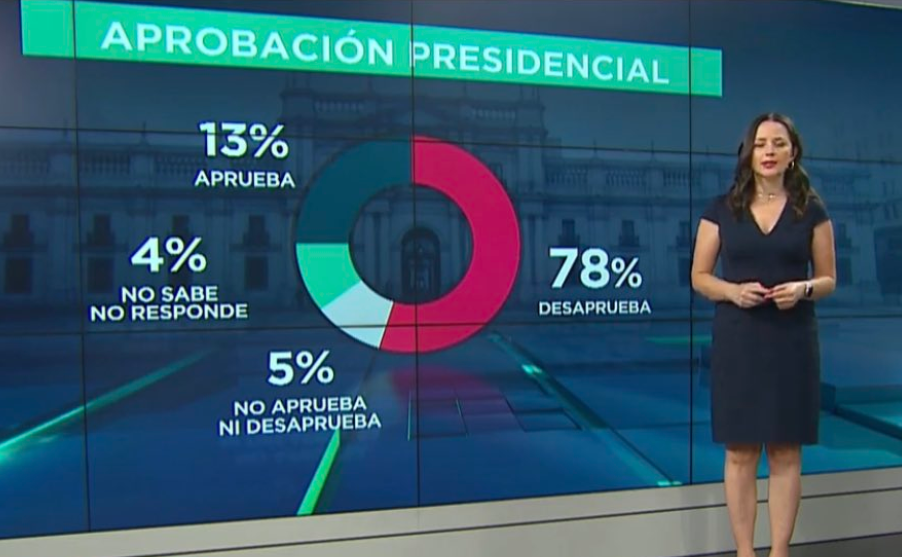

## Referencias
- https://matplotlib.org/2.0.2/faq/usage_faq.html
- https://matplotlib.org/
- https://seaborn.pydata.org/
- https://plotly.com/python/
- https://plotly.com/python/plotly-express
- https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle
- https://matplotlib.org/stable/tutorials/colors/colors.html
- https://matplotlib.org/stable/api/markers_api.html
- https://medium.com/plotly/introducing-plotly-express-808df010143d
- https://towardsdatascience.com/visualization-with-plotly-express-comprehensive-guide-eb5ee4b50b57

## Lectura complementaria
- https://analyticsindiamag.com/top-5-python-libraries-for-data-visualization/
- https://stackoverflow.com/a/56629063/1510734
- https://realpython.com/python-matplotlib-guide
- https://www.forbes.com/sites/naomirobbins/2012/01/04/a-histogram-is-not-a-bar-chart